# [範例重點]
了解機器學習建模的步驟、資料型態以及評估結果等流程

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 建立模型四步驟
在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
讀取資料的方法：
使用 pandas 讀取 .csv 檔：pd.read_csv
使用 numpy 讀取 .txt 檔：np.loadtxt
使用 Scikit-learn 內建的資料集：sklearn.datasets.load_xxx
檢查資料數量：data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
clf.predict(x_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred)

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.01796599 0.05992368 0.92211033]


# [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。 今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

# 作業
1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [18]:
# 讀取乳癌資料集
breast_cancer = datasets.load_breast_cancer()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy',
                            max_depth=None,
                            min_samples_split=5,
                            min_samples_leaf=3)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [19]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9090909090909091


In [20]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [21]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.06628456 0.         0.         0.         0.
 0.         0.         0.         0.         0.01599478 0.
 0.02395426 0.01600595 0.         0.01188443 0.         0.
 0.         0.         0.         0.         0.         0.6910839
 0.01405236 0.02908998 0.         0.13164978 0.         0.        ]


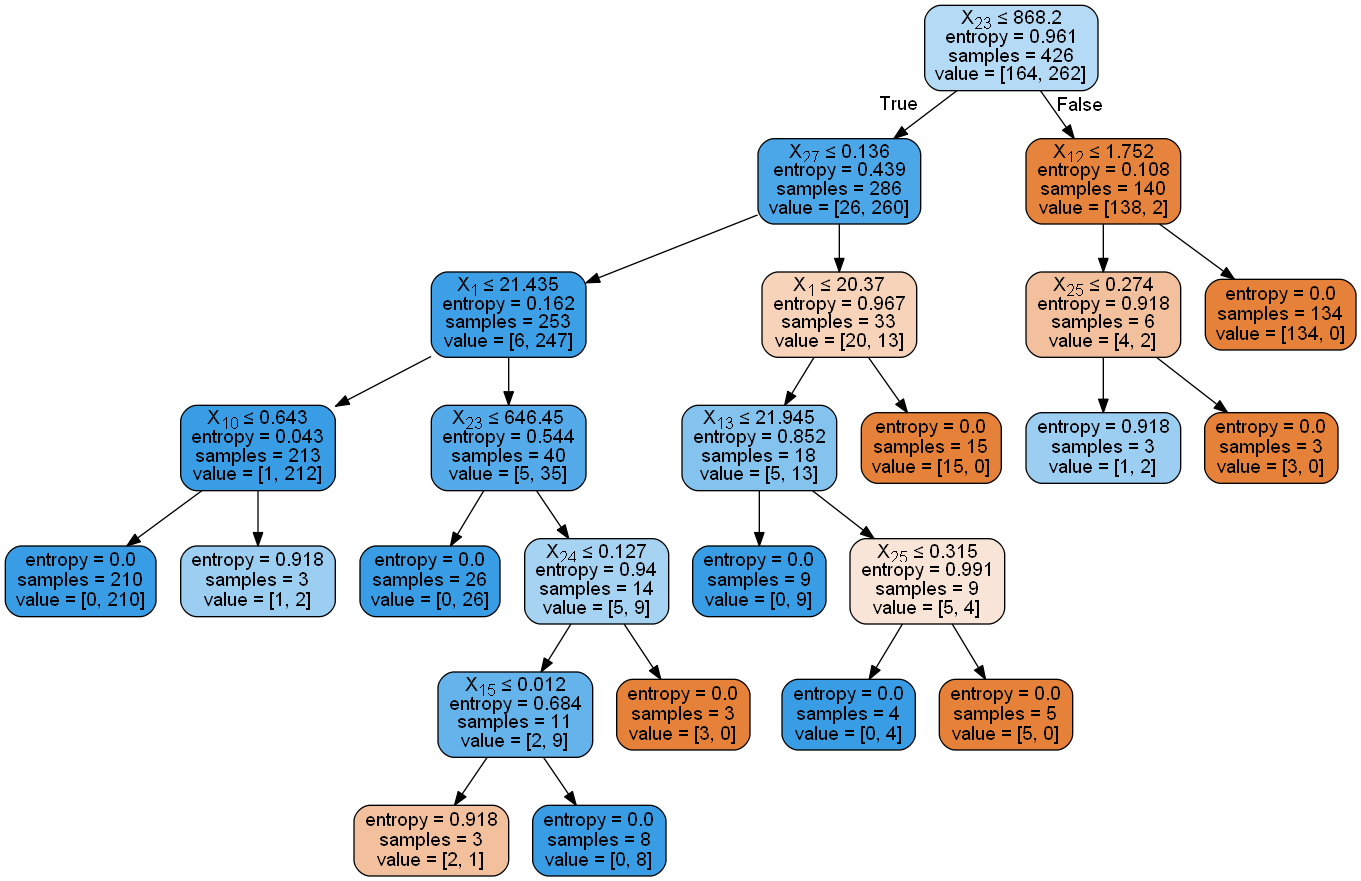

In [22]:
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())